In [1]:
from operator import index

import pandas as pd

In [3]:
details_df = pd.read_csv('E:\\Details.csv')
orders_df = pd.read_csv('E:\\Orders_.csv')

In [4]:
details_df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card


In [5]:
orders_df.head()

,Order ID,Order Date,CustomerName,State,City
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura
1,B-25993,03-02-2018,Madhav,Delhi,Delhi
2,B-25973,24-01-2018,Madan Mohan,Uttar Pradesh,Mathura
3,B-25923,27-12-2018,Gopal,Maharashtra,Mumbai
4,B-25757,21-08-2018,Vishakha,Madhya Pradesh,Indore


In [6]:
merged_df = pd.merge(details_df, orders_df, on='Order ID', how='inner')

In [7]:
print('Merged DataFrame:')

Merged DataFrame:


In [8]:
print(merged_df)

     Order ID  Amount  Profit  Quantity     Category      Sub-Category  \
0     B-25681    1096     658         7  Electronics  Electronic Games   
1     B-26055    5729      64        14    Furniture            Chairs   
2     B-25955    2927     146         8    Furniture         Bookcases   
3     B-26093    2847     712         8  Electronics          Printers   
4     B-25602    2617    1151         4  Electronics            Phones   
...       ...     ...     ...       ...          ...               ...   
1495  B-25700       7      -3         2     Clothing       Hankerchief   
1496  B-25757    3151     -35         7     Clothing          Trousers   
1497  B-25973    4141    1698        13  Electronics          Printers   
1498  B-25698       7      -2         1     Clothing       Hankerchief   
1499  B-25993    4363     305         5    Furniture            Tables   

      PaymentMode  Order Date CustomerName           State     City  
0             COD  04-06-2018       Bhawn

In [9]:
merged_df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City
0,B-25681,1096,658,7,Electronics,Electronic Games,COD,04-06-2018,Bhawna,Madhya Pradesh,Indore
1,B-26055,5729,64,14,Furniture,Chairs,EMI,10-03-2018,Harivansh,Uttar Pradesh,Mathura
2,B-25955,2927,146,8,Furniture,Bookcases,EMI,16-01-2018,Shiva,Maharashtra,Pune
3,B-26093,2847,712,8,Electronics,Printers,Credit Card,27-03-2018,Sarita,Maharashtra,Pune
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card,01-04-2018,Vrinda,Maharashtra,Pune


In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1500 non-null   object
 1   Amount        1500 non-null   int64 
 2   Profit        1500 non-null   int64 
 3   Quantity      1500 non-null   int64 
 4   Category      1500 non-null   object
 5   Sub-Category  1500 non-null   object
 6   PaymentMode   1500 non-null   object
 7   Order Date    1500 non-null   object
 8   CustomerName  1500 non-null   object
 9   State         1500 non-null   object
 10  City          1500 non-null   object
dtypes: int64(3), object(8)
memory usage: 129.0+ KB


In [12]:
print(merged_df.columns)


Index(['Order ID', 'Amount', 'Profit', 'Quantity', 'Category', 'Sub-Category',
       'PaymentMode', 'Order Date', 'CustomerName', 'State', 'City'],
      dtype='object')


In [15]:
merged_df['Profit Margin %'] = (merged_df['Profit'] / merged_df['Amount']) * 100


In [18]:
print("\nMereged Dtafarme With Profit Mergine:")
print(merged_df.head())


Mereged Dtafarme With Profit Mergine:
  Order ID  Amount  Profit  Quantity     Category      Sub-Category  \
0  B-25681    1096     658         7  Electronics  Electronic Games   
1  B-26055    5729      64        14    Furniture            Chairs   
2  B-25955    2927     146         8    Furniture         Bookcases   
3  B-26093    2847     712         8  Electronics          Printers   
4  B-25602    2617    1151         4  Electronics            Phones   

   PaymentMode  Order Date CustomerName           State     City  \
0          COD  04-06-2018       Bhawna  Madhya Pradesh   Indore   
1          EMI  10-03-2018    Harivansh   Uttar Pradesh  Mathura   
2          EMI  16-01-2018        Shiva     Maharashtra     Pune   
3  Credit Card  27-03-2018       Sarita     Maharashtra     Pune   
4  Credit Card  01-04-2018       Vrinda     Maharashtra     Pune   

   Profit Margin %  
0        60.036496  
1         1.117123  
2         4.988042  
3        25.008781  
4        43.981658  

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

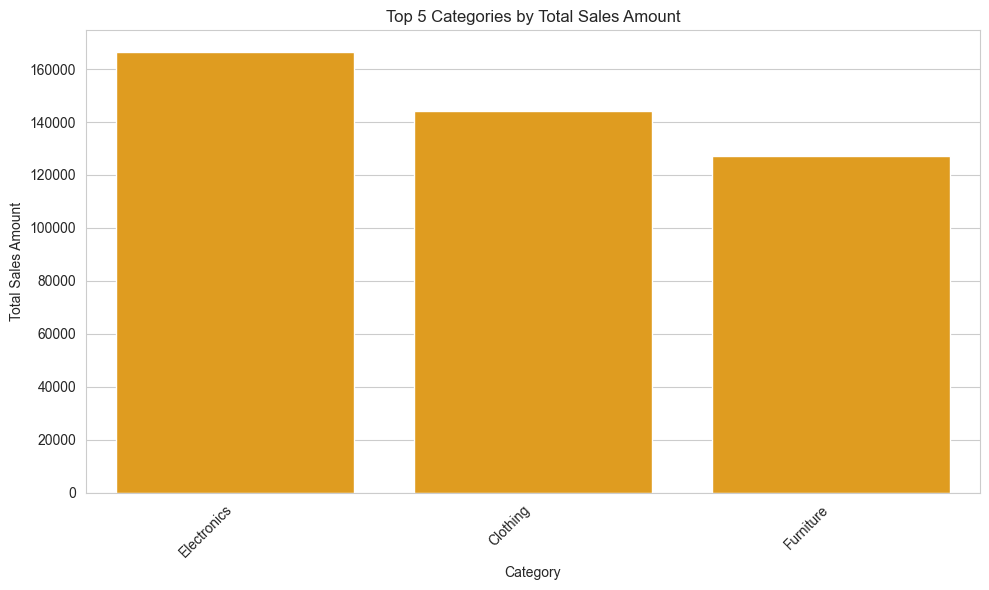

In [33]:
category_sales = merged_df.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, color="Orange")
plt.title('Top 5 Categories by Total Sales Amount')
plt.xlabel('Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\MAHAKAAL\AppData\Local\Temp\ipykernel_9172\3688992739.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_profit_df, x='PaymentMode', y='Profit', palette="rocket")


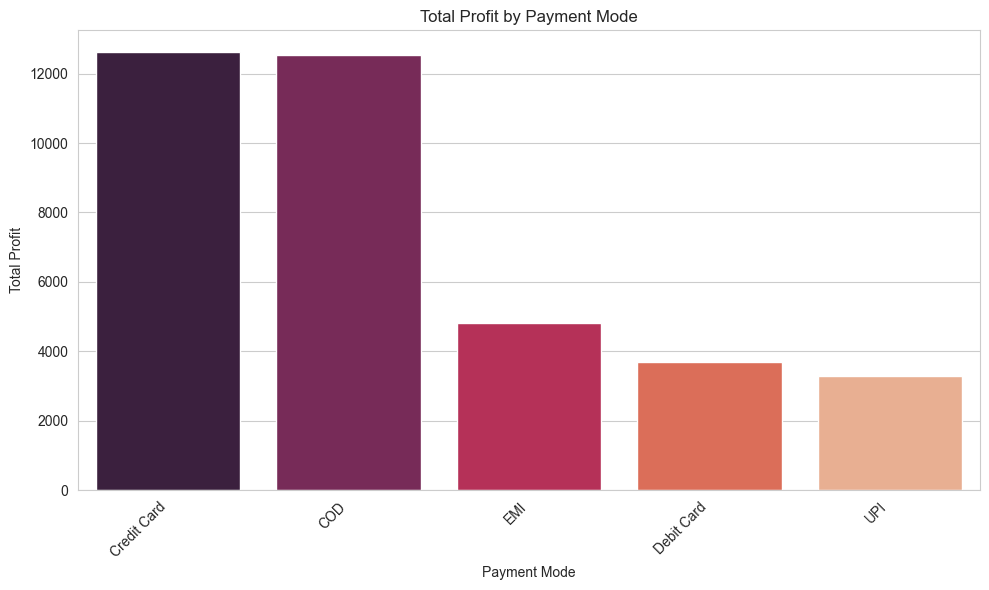

In [35]:
payment_profit = merged_df.groupby('PaymentMode')['Profit'].sum().sort_values(ascending=False)

# Convert to DataFrame for Seaborn
payment_profit_df = payment_profit.reset_index()  # Columns: 'PaymentMode' and 'Profit'

plt.figure(figsize=(10, 6))
sns.barplot(data=payment_profit_df, x='PaymentMode', y='Profit', palette="rocket")
plt.title('Total Profit by Payment Mode')
plt.xlabel('Payment Mode')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


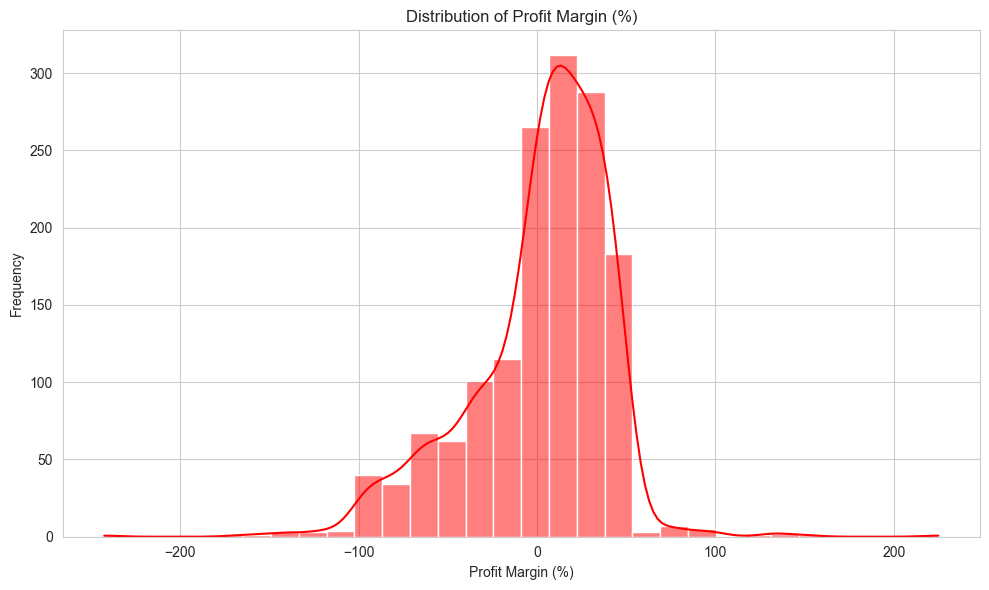

In [37]:
# Ensure 'Profit Margin (%)' exists
if 'Profit Margin (%)' not in merged_df.columns:
    merged_df['Profit Margin (%)'] = (merged_df['Profit'] / merged_df['Amount']) * 100

# Visualization: Profit Margin Distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Profit Margin (%)'], bins=30, kde=True, color='red')
plt.title('Distribution of Profit Margin (%)')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

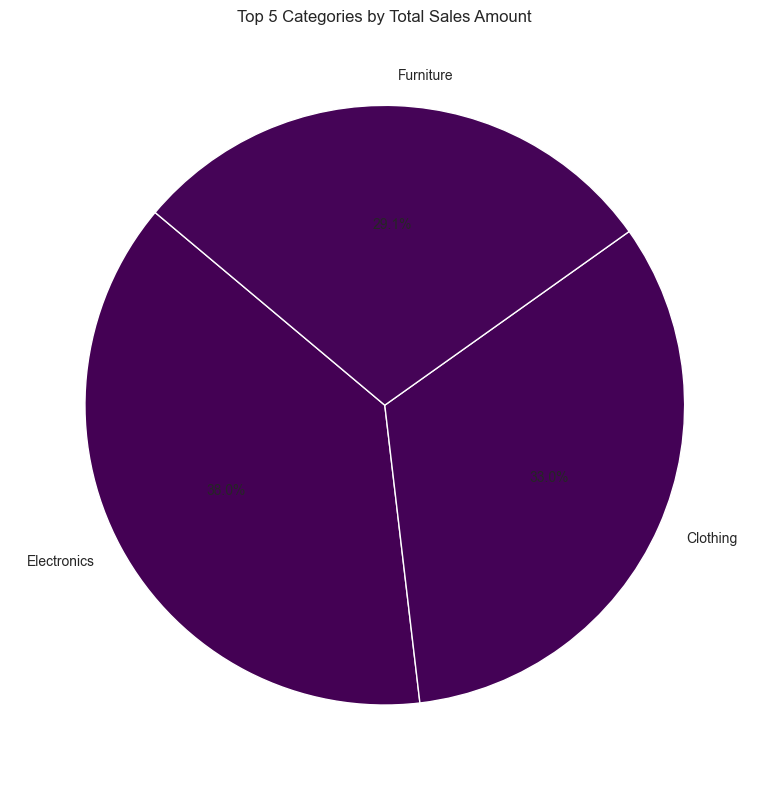

In [38]:
# Prepare data
category_sales = merged_df.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 8))
plt.pie(
    category_sales.values,
    labels=category_sales.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.viridis(range(len(category_sales)))
)
plt.title('Top 5 Categories by Total Sales Amount')
plt.tight_layout()
plt.savefig('top_5_categories_sales_pie_chart.png')
plt.show()
